In [1]:
# Load necessary libraries

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import re
import sys
from hashlib import sha1
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier

In [2]:
store_data = pd.read_csv("B:YTé - Store Dataset 2023.csv", index_col=0)
store_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age
0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51
1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27
2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39
3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39
4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30
...,...,...,...,...,...,...,...,...,...
61858,04/07/2022,20203,32900,Hat,FO112,3.0,64.6,16.4,24
61859,04/07/2022,20203,32900,T-shirt,I36F2,1.0,45.0,32.5,24
61860,04/07/2022,20203,32900,Shorts,4X8P4,1.0,51.9,39.2,24
61861,04/07/2022,20203,32900,Skirt,ZVTO4,1.0,45.7,35.9,24


# Data Cleaning

Looking through the dataset, some of the data entries are incorrect as the `Date` column entered is an impossible date. The date `29/02/2022` is impossible because 2022 is not a leap year, so there are only 28 days in the month of February 2022. Thus, we removed the rows with `Date: 29/02/2022` since we aren't sure if the data exists at a different date, or doesn't exist originally.

For the `Quantity` column, there can only be positive integer values for the meaning of `Quantity` to make sense. However, there are quantity values with non-integer values, so we removed those entries as well.

In [3]:
store_data = store_data[store_data["Date"] != "29/02/2022"]
store_data = store_data[store_data["Quantity"] % 1 == 0]
store_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age
0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51
1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27
2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39
3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39
4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30
...,...,...,...,...,...,...,...,...,...
61858,04/07/2022,20203,32900,Hat,FO112,3.0,64.6,16.4,24
61859,04/07/2022,20203,32900,T-shirt,I36F2,1.0,45.0,32.5,24
61860,04/07/2022,20203,32900,Shorts,4X8P4,1.0,51.9,39.2,24
61861,04/07/2022,20203,32900,Skirt,ZVTO4,1.0,45.7,35.9,24


In [4]:
quarter_map = ["Q1","Q1","Q1","Q2","Q2","Q2","Q3","Q3","Q3","Q4","Q4","Q4"]
def date_to_quarter(date: str) -> str:
  date_split = [int(x) for x in date.split("/")]
  day = date_split[0]
  month = date_split[1]
  year = date_split[2]
  quarter_name = quarter_map[month - 1]
  return "{0}, {1}".format(quarter_name, year)
month_map = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
def date_to_month(date: str) -> str:
  date_split = [int(x) for x in date.split("/")]
  day = date_split[0]
  month = date_split[1]
  year = date_split[2]
  month_name = month_map[month - 1]
  return "{0}".format(month_name)

In [5]:
store_data["Quarter"] = store_data["Date"].apply(date_to_quarter)
store_data["Month"] = store_data["Date"].apply(date_to_month)
store_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age,Quarter,Month
0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51,"Q1, 2022",Jan
1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27,"Q1, 2022",Jan
2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39,"Q1, 2022",Jan
3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39,"Q1, 2022",Jan
4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30,"Q1, 2022",Jan
...,...,...,...,...,...,...,...,...,...,...,...
61858,04/07/2022,20203,32900,Hat,FO112,3.0,64.6,16.4,24,"Q3, 2022",Jul
61859,04/07/2022,20203,32900,T-shirt,I36F2,1.0,45.0,32.5,24,"Q3, 2022",Jul
61860,04/07/2022,20203,32900,Shorts,4X8P4,1.0,51.9,39.2,24,"Q3, 2022",Jul
61861,04/07/2022,20203,32900,Skirt,ZVTO4,1.0,45.7,35.9,24,"Q3, 2022",Jul


# Create 10-Year Age Groups

In [6]:
# Extract the age and create bins for different age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age_Group' based on the age bins and labels
store_data['Age_Group'] = pd.cut(store_data['Customer_Age'], bins=age_bins, labels=age_labels)

Text(0.5, 1.0, 'Distribution of Customer Ages')

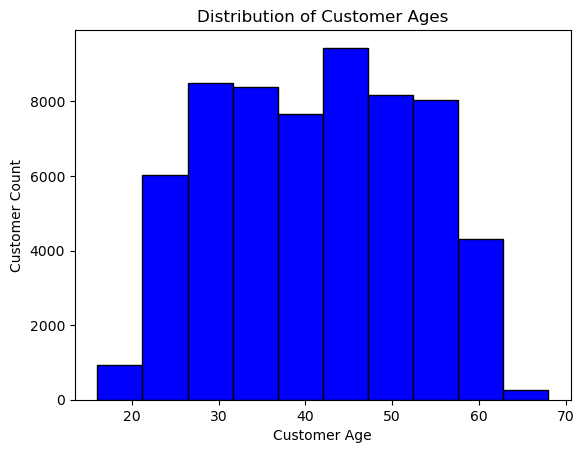

In [7]:
plt.hist(store_data['Customer_Age'], bins = 10, color='blue',edgecolor='black')
plt.xlabel("Customer Age")
plt.ylabel("Customer Count")
plt.title("Distribution of Customer Ages")

/var/folders/v0/lmm7tvts47v_v412r418pbph0000gn/T/ipykernel_66776/3416736299.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sum = store_data.groupby('Age_Group')['Gross_Profit'].sum().reset_index()


Text(0.5, 1.0, 'Distribution of Customer Ages VS sum of gross profit')

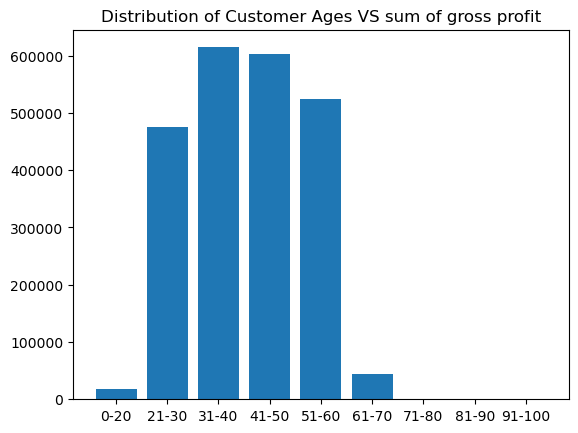

In [8]:
# Extract the age and create bins for different age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Add a new column 'Age_Group' based on age bins
store_data['Age_Group'] = pd.cut(store_data['Customer_Age'], bins=age_bins, labels=age_labels)

store_data["Gross_Profit"] = store_data["Sales_Amount"] - store_data["Operational_Cost"]


# Group by 'Age' and calculate the sum of 'GrossProfit'
age_group_sum = store_data.groupby('Age_Group')['Gross_Profit'].sum().reset_index()

store_data["Gross_Profit"] = store_data["Sales_Amount"] - store_data["Operational_Cost"]
plt.bar(age_group_sum["Age_Group"], age_group_sum["Gross_Profit"])
plt.title("Distribution of Customer Ages VS sum of gross profit")


Text(0.5, 1.0, 'Total Gross Profit in 2022 per Category')

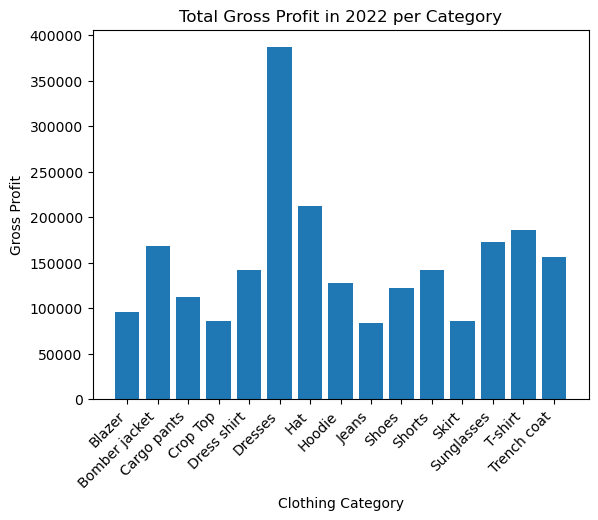

In [9]:
store_category_groups = store_data.groupby('SKU_Category')
summary = store_category_groups['Gross_Profit'].sum()
summary = summary.reset_index()
plt.bar(summary["SKU_Category"], summary["Gross_Profit"])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Clothing Category")
plt.ylabel("Gross Profit")
plt.title("Total Gross Profit in 2022 per Category")

In 2022, most of the total gross profit came from selling dresses, which is nearly double the total gross profit from the second highest profit, coming from hats. Clothing items with the least gross profit are blazers, crop tops, jeans, and skirts.

# Exploring returning customer's age

/var/folders/v0/lmm7tvts47v_v412r418pbph0000gn/T/ipykernel_66776/3338028160.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_vs_returning_customers = returning_customers.groupby('Age_Group')['Customer_ID'].nunique().reset_index()


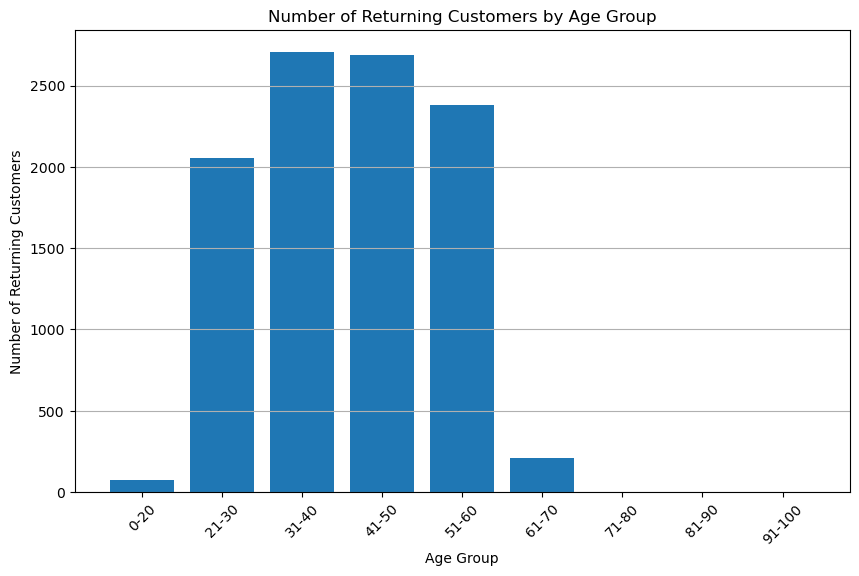

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the age and create bins for different age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Add a new column 'Age_Group' based on age bins
store_data['Age_Group'] = pd.cut(store_data['Customer_Age'], bins=age_bins, labels=age_labels)

# Filter the dataset to include only rows with multiple transactions for the same Customer_ID
returning_customers = store_data[store_data.duplicated(subset='Customer_ID', keep=False)]

# Group by Age_Group and count the number of unique Customer_IDs (returning customers) for each age group
age_group_vs_returning_customers = returning_customers.groupby('Age_Group')['Customer_ID'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(age_group_vs_returning_customers['Age_Group'], age_group_vs_returning_customers['Customer_ID'])
plt.xlabel('Age Group')
plt.ylabel('Number of Returning Customers')
plt.title('Number of Returning Customers by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Most repurchased product

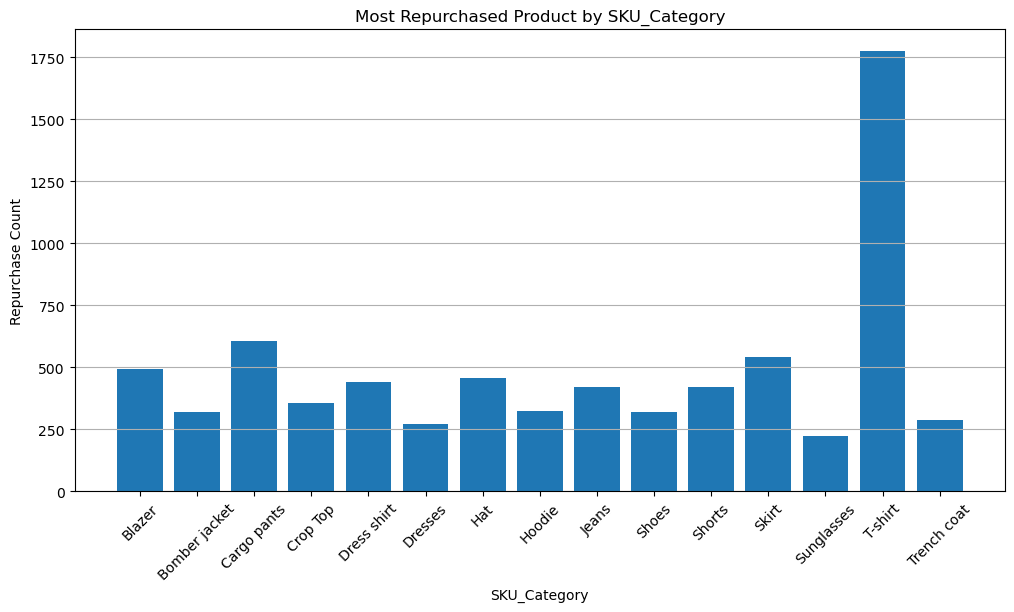

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called store_data
# Filter the dataset to include only rows with multiple transactions for the same Customer_ID
returning_customers = store_data[store_data.duplicated(subset='Customer_ID', keep=False)]

# Group by SKU_Category and SKU, then count the number of times each SKU is repurchased
repurchased_products = returning_customers.groupby(['SKU_Category', 'SKU'])['Transaction_ID'].count().reset_index()
repurchased_products.rename(columns={'Transaction_ID': 'Repurchase_Count'}, inplace=True)

# Find the SKU with the highest repurchase count within each SKU_Category
most_repurchased_products = repurchased_products.groupby('SKU_Category').apply(lambda x: x.nlargest(1, 'Repurchase_Count')).reset_index(drop=True)

# Create a bar plot to visualize the most repurchased products by SKU_Category
plt.figure(figsize=(12, 6))
plt.bar(most_repurchased_products['SKU_Category'], most_repurchased_products['Repurchase_Count'])
plt.xlabel('SKU_Category')
plt.ylabel('Repurchase Count')
plt.title('Most Repurchased Product by SKU_Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Price distribution for each category

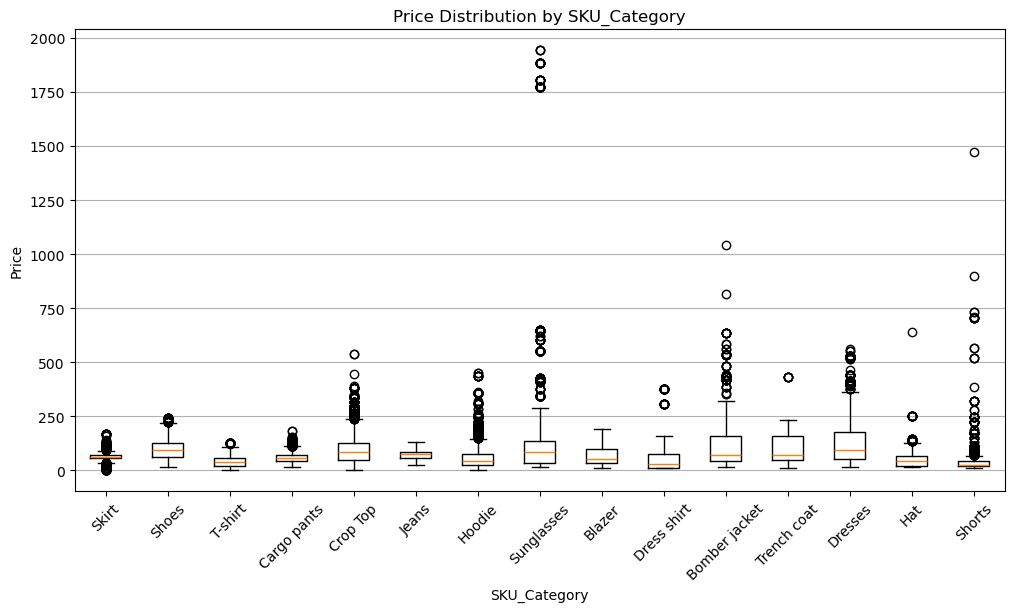

In [12]:
import matplotlib.pyplot as plt

# Calculate the price for each row
store_data['Price'] = store_data['Sales_Amount'] / store_data['Quantity']

# Create a box plot for each SKU_Category
plt.figure(figsize=(12, 6))
plt.boxplot([store_data[store_data['SKU_Category'] == category]['Price'] for category in store_data['SKU_Category'].unique()],
            labels=store_data['SKU_Category'].unique())
plt.xlabel('SKU_Category')
plt.ylabel('Price')
plt.title('Price Distribution by SKU_Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


/var/folders/v0/lmm7tvts47v_v412r418pbph0000gn/T/ipykernel_66776/3636758010.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tshirt_data['Age_Group'] = pd.cut(tshirt_data['Customer_Age'], bins=age_bins, labels=age_labels)
/var/folders/v0/lmm7tvts47v_v412r418pbph0000gn/T/ipykernel_66776/3636758010.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = tshirt_data.groupby('Age_Group')['Customer_ID'].count()


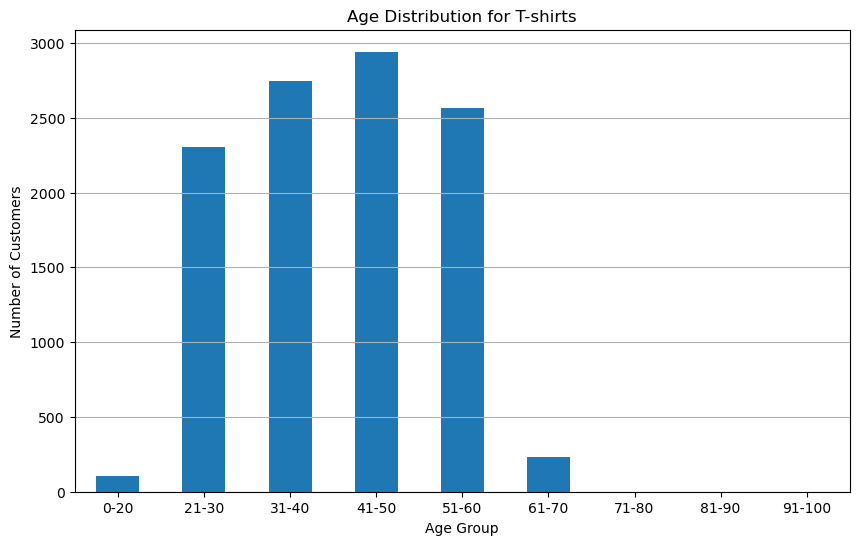

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called store_data
# Filter the dataset to include only rows with SKU_Category "T-shirt"
tshirt_data = store_data[store_data['SKU_Category'] == 'T-shirt']

# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age_Group' based on the specified age bins and labels
tshirt_data['Age_Group'] = pd.cut(tshirt_data['Customer_Age'], bins=age_bins, labels=age_labels)

# Group by 'Age_Group' and count the number of customers in each age group
age_distribution = tshirt_data.groupby('Age_Group')['Customer_ID'].count()

# Create a bar plot to visualize the age distribution for T-shirts
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', rot=0)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Age Distribution for T-shirts')
plt.grid(axis='y')
plt.show()


In [14]:
store_data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age,Quarter,Month,Age_Group,Gross_Profit,Price
0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51,"Q1, 2022",Jan,51-60,18.9,63.500000
1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27,"Q1, 2022",Jan,21-30,14.8,55.900000
2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39,"Q1, 2022",Jan,31-40,16.2,68.800000
3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39,"Q1, 2022",Jan,31-40,25.4,82.100000
4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30,"Q1, 2022",Jan,21-30,23.8,82.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61858,04/07/2022,20203,32900,Hat,FO112,3.0,64.6,16.4,24,"Q3, 2022",Jul,21-30,48.2,21.533333
61859,04/07/2022,20203,32900,T-shirt,I36F2,1.0,45.0,32.5,24,"Q3, 2022",Jul,21-30,12.5,45.000000
61860,04/07/2022,20203,32900,Shorts,4X8P4,1.0,51.9,39.2,24,"Q3, 2022",Jul,21-30,12.7,51.900000
61861,04/07/2022,20203,32900,Skirt,ZVTO4,1.0,45.7,35.9,24,"Q3, 2022",Jul,21-30,9.8,45.700000


# Distribution of Total Profit Over Time

Text(0.5, 1.0, 'Total Gross Profit Per Quarter')

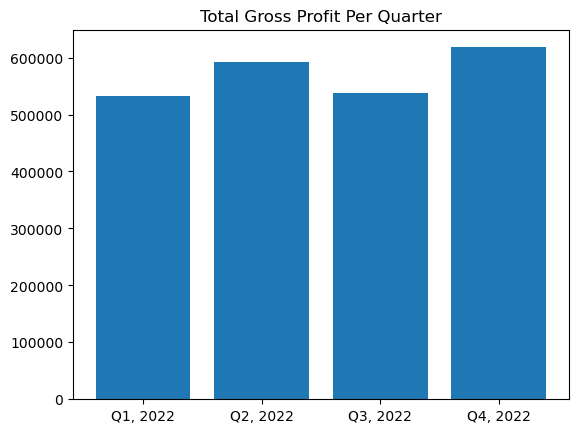

In [25]:
store_data.groupby("Quarter").agg({"Gross_Profit": "sum"})
quarters = ["Q1, 2022", "Q2, 2022", "Q3, 2022", "Q4, 2022"]
gross_profit_per_quarter = [532482.4, 592074.3, 537344.4, 618058.4]
plt.bar(quarters, gross_profit_per_quarter)
plt.title("Total Gross Profit Per Quarter")

Text(0.5, 1.0, 'Total Gross Profit Per Month')

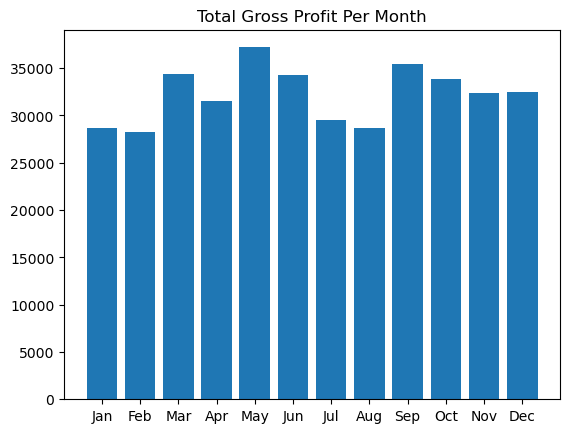

In [43]:
shirts_only = store_data[store_data["SKU_Category"] == "Dresses"]
shirts_only.groupby("Month").agg({"Gross_Profit": "sum"})
gross_profit_per_month = [28672.3, 28242.2, 34331.8, 31507.9, 37205.4, 34305.5, 29517.3, 28665.1, 35458.9, 33823.3, 32325.4, 32530.3]
plt.bar(month_map, gross_profit_per_month)
plt.title("Total Gross Profit Per Month")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Blazer'),
  Text(1, 0, 'Bomber jacket'),
  Text(2, 0, 'Cargo pants'),
  Text(3, 0, 'Crop Top'),
  Text(4, 0, 'Dress shirt'),
  Text(5, 0, 'Dresses'),
  Text(6, 0, 'Hat'),
  Text(7, 0, 'Hoodie'),
  Text(8, 0, 'Jeans'),
  Text(9, 0, 'Shoes'),
  Text(10, 0, 'Shorts'),
  Text(11, 0, 'Skirt'),
  Text(12, 0, 'Sunglasses'),
  Text(13, 0, 'T-shirt'),
  Text(14, 0, 'Trench coat')])

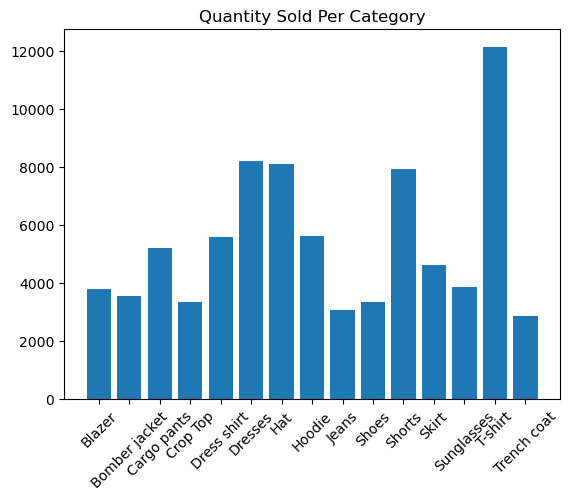

In [46]:
store_data.groupby("SKU_Category").agg({"Quantity": "sum"})
categories = ["Blazer", "Bomber jacket", "Cargo pants", "Crop Top", "Dress shirt", "Dresses", "Hat", "Hoodie", "Jeans", "Shoes", "Shorts", "Skirt", "Sunglasses", "T-shirt", "Trench coat"]
quantity_per_category = [3783, 3541, 5193, 3346, 5586, 8181, 8098, 5613, 3071, 3335, 7929, 4625, 3873, 12126, 2854]
plt.bar(categories, quantity_per_category)
plt.title("Quantity Sold Per Category")
plt.xticks(rotation=45)